# Importing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Preprocessing the Data

In [9]:
le_mainroad = LabelEncoder()
df['mainroad'] = le_mainroad.fit_transform(df['mainroad'])

In [10]:
le_guestroom = LabelEncoder()
df['guestroom'] = le_guestroom.fit_transform(df['guestroom'])

In [11]:
le_hotwaterheating = LabelEncoder()
df['hotwaterheating'] = le_hotwaterheating.fit_transform(df['hotwaterheating'])

In [12]:
le_basement = LabelEncoder()
df['basement'] = le_basement.fit_transform(df['basement'])

In [13]:
le_airconditioning = LabelEncoder()
df['airconditioning'] = le_airconditioning.fit_transform(df['airconditioning'])

In [14]:
le_parking = LabelEncoder()
df['parking'] = le_parking.fit_transform(df['parking'])

In [15]:
le_prefarea = LabelEncoder()
df['prefarea'] = le_prefarea.fit_transform(df['prefarea'])

In [16]:
le_furnishingstatus = LabelEncoder()
df['furnishingstatus'] = le_furnishingstatus.fit_transform(df['furnishingstatus'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


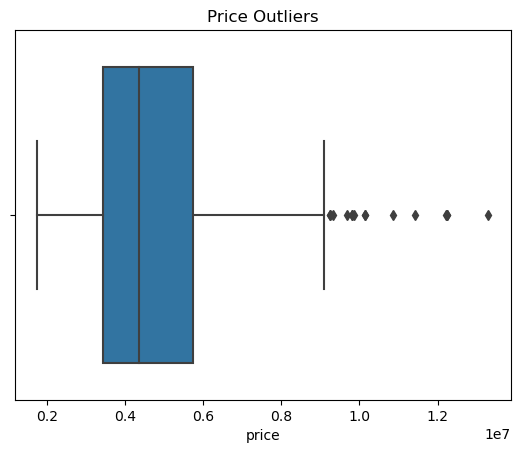

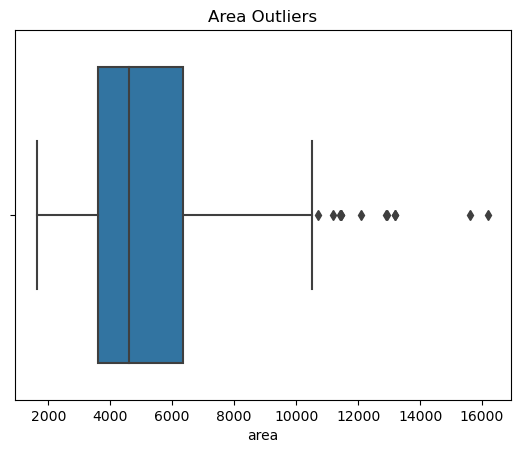

In [19]:
# Price
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

# Area
sns.boxplot(x=df['area'])
plt.title("Area Outliers")
plt.show()


In [20]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df_price_outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]

In [21]:
df.drop(df_price_outliers.index, inplace = True)

In [22]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

df_area_outliers = df[(df['area'] < Q1 - 1.5 * IQR) | (df['area'] > Q3 + 1.5 * IQR)]

In [23]:
df.drop(df_area_outliers.index, inplace = True)

In [24]:
# scaler = StandardScaler()
# df['area'] = scaler.fit_transform(df[['area']])

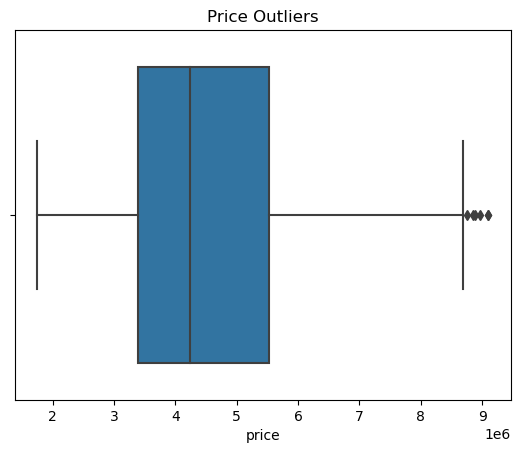

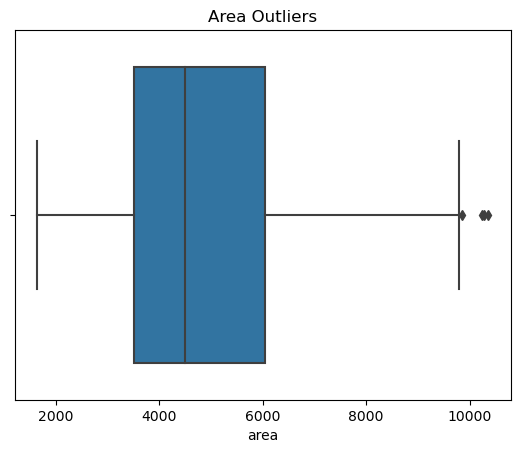

In [25]:
# Price
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

# Area
sns.boxplot(x=df['area'])
plt.title("Area Outliers")
plt.show()


# Splitting of Data

In [26]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Linear Regression model

In [28]:
lr = LinearRegression()

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
mae = mean_absolute_error(y_test,y_pred)

In [34]:
mse = mean_squared_error(y_test,y_pred)

In [35]:
rmse = np.sqrt(mse)

In [36]:
r2 = r2_score(y_test,y_pred)

In [37]:
print("Model Evaluation Metrics:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

Model Evaluation Metrics:
MAE:  742678.29
MSE:  977664860283.97
RMSE: 988769.37
R²:   0.6668
